<a href="https://colab.research.google.com/github/AArna1211/Traffic-prediction/blob/main/TP_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout

In [11]:
data = pd.read_csv('/content/Traffic.csv')

In [12]:
data.shape

(2976, 9)

In [13]:
# Encode categorical "Traffic Situation"
label_encoder = LabelEncoder()
data["Traffic Situation Encoded"] = label_encoder.fit_transform(data["Traffic Situation"])

# Prepare features and labels
X = data[["CarCount", "BikeCount", "BusCount", "TruckCount", "Total"]].values
y = data["Traffic Situation Encoded"].values

# Reshape input for CNN
X = X.reshape((X.shape[0], X.shape[1], 1))

In [14]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Define CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X.shape[1], 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=2, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6080 - loss: 1.9131 - val_accuracy: 0.6812 - val_loss: 0.7585
Epoch 2/20
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6465 - loss: 0.7903 - val_accuracy: 0.6913 - val_loss: 0.7093
Epoch 3/20
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6610 - loss: 0.7388 - val_accuracy: 0.6913 - val_loss: 0.7128
Epoch 4/20
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6802 - loss: 0.7289 - val_accuracy: 0.7064 - val_loss: 0.6532
Epoch 5/20
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6476 - loss: 0.7294 - val_accuracy: 0.7131 - val_loss: 0.6272
Epoch 6/20
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7151 - loss: 0.6640 - val_accuracy: 0.7634 - val_loss: 0.5759
Epoch 7/20
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7346 - loss: 0.6400 - val_accuracy: 0.8205 - val_loss: 0.4517
Epoch 8/20
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7804 - loss: 0.5220 - 

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test Accuracy: 0.8758
Mean Absolute Error: 0.2198


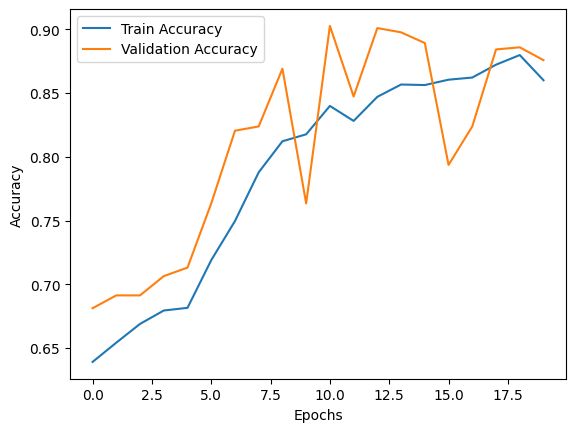

In [18]:
# Evaluate model
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
